In [29]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

# 6. Richer Representations: Beyond the Normal and Extensive Forms

There are several reasons we want to explore other forms of game. Firstly, so far we have assumed a lot of finite variables. The number of decisions / time is finite, the players are finite, and the actions have been finite. We may want to consider what happens for infinite agents, or for games which are repeated forever. Secondly, so far we have assumed that agents share a knowledge of eachother's payoffs. This is very unrealistic! Thirdly, we would like to find more compact ways of describing games, for the sake of efficiency.

## 6.1 Repeated games

Consider a game like the prisoner's dilemma, in normal form, which is played multiple times. In the case that agents have no information about previous games the answer is pretty trivial. However, if agents can see what happened before then things become more complicated.

### 6.1.1 Finitely repeated games

With a finitely repeated game we simply need a bigger table in the normal form (or tree in the extensive form) to capture the strategies and payoffs for both players. We assume that agents don't know what eachother will play, but find out later. One simple answer is just to play the same strategy at each game level, which we call a *stationary strategy*. But in general, the action can depend on what was played before.

All finitely repeated games can be represented as imperfect-information tree in extensive form. Player 1 does and action, then player 2 does an action (unknown by player 1), then both players see the result.

### 6.1.2 Infinitely repeated games

If a game is repeated infinitely we get an infinite tree of decisions. In order to quantify the reward of being in a state we can consider the average reward over all games, or a discounted reward of future games (i.e., the agent cares more about the present, or the games might end at some random point). 

In infinitely repeated games there are strategies other than the stationary ones. For instance we have Tit-for-Tat (TfT) in which players start by cooperating and then repeat whatever their opponent's strategy was.

Ideally we want to be able to calculate the equilibirum strategies in infinitely repeated games. A good place to start is the **The Folk Theorem**, which states that an equilibrium exists for any average payoffs where the agents are each avoiding their worst outcome. These are equilibrium because players can threaten to cause the worst outcome of another in perpetuity if they deviate. Consider this game:

$
\begin{array}{c|ccc}
\text{} & A & B \\
\hline
\text{A} & 4,4 & 1,5 \\
\text{B} & 5,1 & 0,0 \\
\end{array}
$

If we just analyse this as a one-off game we see there are two equilibria, at (A,B) and (B,A). But in the infinite case there is also the equilibria at (A,A). This is because both players can threaten to play B for the rest of time, if their opponent does. Remaining at A becomes an equilibrium strategy. We say (A,A) is *enforcable*.

Note this fits for *any* set of enforable payoffs, not just the strategies that can be used. For instance, consider this game:

$
\begin{array}{c|ccc}
\text{} & A & B \\
\hline
\text{A} & 0,0 & 0,1 \\
\text{B} & 1,0 & 0,0 \\
\end{array}
$

Say the agents are swapping between (A,B) and (B,A) each game. The average payoff is 0.5 for each. The row player can enforce this system by threatening to play B forever onwards if the column player deviates, and likewise the column player can threaten to play A forever if the row player deviates.

While this is useful, it is very broad. For instance, if the strategy is to play (A,B) 99 times for every (B,A) this is still enforcible by the column player, thought it's unfair.

### 6.1.3 "Bounded rationality": repeated games played by automata

The big problem when dealing with repeated games is that there are many more options to choose from. This imposes a computational burden on the decision maker, which reduces their ability to be fully rational. We simply can't crunch out all the options. At the same time, people don't behave as we would expect from any rational model. Consider the finitely repeated prisoner's dilemma. When playing the last game it is obviously optimal to defect, there are no more games to worry about. But then if that's the case, and we expect our opponent to defect as well, then we should also defect one game earlier. And so it unwinds completely. But in reality people tend to cooperate at first instead. What other models might explain this fact?

One early proposal was the idea of $\epsilon$-equilibrium, which is where agents accept a given strategy so long as they are losing no more than $\epsilon$ by sticking with it. I.e., the players can absorb some small loss. The nash equilibria is then just a special case at $\epsilon=0$. Consider the Centipede game, where at each point the players if they cooperate alternate between receiving +2 and -1:

$
\begin{array}{ccccccccc}
\text{A:} & 2 & 1 & 3 & 2 & 4 & 3 & 5\\
\text{B:} & 0 & 2 & 1 & 3 & 2 & 4 & 3 \\
\end{array}
$

In the fully rational case B will stop cooperating at the second-to-last step, as 4>3. Given that, A will stop at the third-to-last, and so on. Eventually the most rational thing for both players is to defect as soon as possible. But if we use $\epsilon>1$, then neither player will mind losing at the last stage, and the chain goes right to the end.

Another option, and one with a lot of success, is to restrict agent's behaviours to those which can be implemented by an automata. This fits nicely with the imperfect-information form tree, where we need to make a decision at each information-set. An example automata might be something like this:

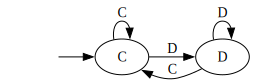

In [56]:
graph1 = Digraph()
graph1.attr(rankdir='LR')
graph1.node('Start', '', style='invis')
graph1.node('C', 'C')
graph1.node('D', 'D')
graph1.edge('Start', 'C', '', color="black")
graph1.edge('C', 'C', 'C', color="black")
graph1.edge('C', 'D', 'D', color="black")
graph1.edge('D', 'C', 'C', color="black")
graph1.edge('D', 'D', 'D', color="black")
display(graph1)

This is a representation of the classic Tit-for-Tat strategy. An automata is just a specification of a list of states, an action to take each state, and a transition function for every action taken (including other player's). We can say that both players will decide which automata to use before the game, and put a limit on the size of the automata to constrain rationality. In order to do backwards-induction on a game with $k$ iterations you need $k$ states.